In [4]:
import pandas as pd
import numpy as np
import conf
import matplotlib.pyplot as plt

In [5]:
X = pd.read_csv(conf.X_train_reformated,index_col=False)

index                           int64
acc_now_delinq                  int64
addr_state                     object
annual_inc                    float64
chargeoff_within_12_mths      float64
collections_12_mths_ex_med    float64
delinq_2yrs                     int64
dti                           float64
earliest_cr_line              float64
emp_length                     object
fico_range_high                 int64
fico_range_low                  int64
funded_amnt                   float64
home_ownership                 object
inq_last_12m                  float64
installment                   float64
int_rate                        int64
issue_d                       float64
loan_amnt                     float64
mort_acc                      float64
mths_since_last_delinq        float64
mths_since_recent_bc_dlq      float64
mths_since_recent_inq         float64
num_accts_ever_120_pd         float64
num_actv_bc_tl                float64
num_rev_accts                 float64
num_sats    

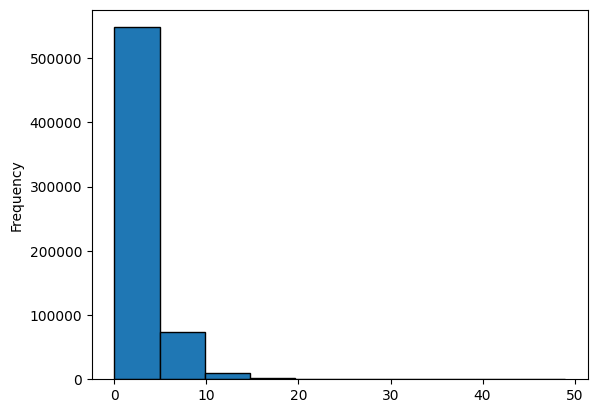

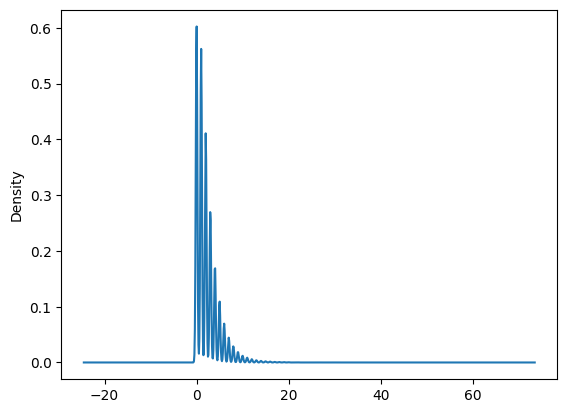

In [7]:
print(X.dtypes)
X['inq_last_12m'].plot(kind='hist', edgecolor='black')
print(X['inq_last_12m'].dtype)
data_ = X['inq_last_12m']
print(type(data_[0]))
plt.show()
X['inq_last_12m'].plot(kind='kde')
plt.show()

In [19]:
counts, bins = np.histogram(X['dti'], density=True)
# print(bins.shape)
h_ = np.diff(bins)
int_ = np.sum(counts*np.diff(bins))


class Distrib1D:
    counts_: np.array
    bins_: np.array
    max_: np.float64
    def __init__(self,table:pd.DataFrame, column_name:str):
        self.counts_, self.bins_ = np.histogram(table[column_name], density=True)
        self.max_ = np.max(self.counts_)
    def __call__(self, x):
        for i in range(1,len(self.bins_)-1):
            if x<= self.bins_[i] and x>= self.bins_[i-1]:
                return self.counts_[i-1]
        return 0.0
    

def make_distib(table:pd.DataFrame, column_name:str):
    x = table[column_name]
    # q25, q75 = np.nanpercentile(x, [25, 75])
    # bin_width = 2 * (q75 - q25) * len(x) ** (-1 / 3)
    # print(bin_width)
    # n_bins = np.minimum(100, round((np.nanmax(x) - np.nanmin(x)) / bin_width))
    counts, bins = np.histogram(x, density=True)
    def density(x):
        for i in range(1,len(bins)-1):
            if x<= bins[i] and x>= bins[i-1]:
                return counts[i-1]
        return 0.0
    return density

        
# def make_distibutions_of_
distr_ = Distrib1D(X,'delinq_2yrs')
        

0.23632062777430446


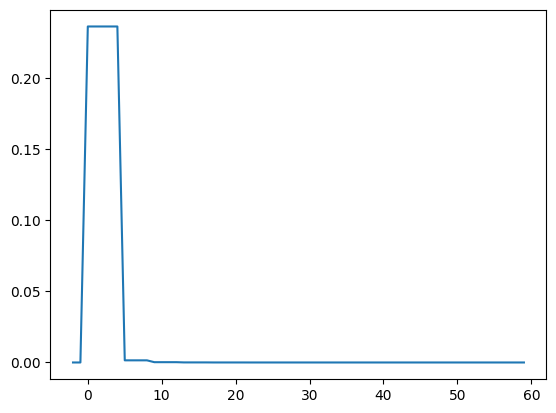

In [20]:
N= 10000
# x_ = np.linspace(start=-10.0,stop=60.0,num=N)
x_ = np.arange(start=-2,stop=60,step=1)
y_ = [distr_(el) for el in x_]
print(distr_.max_)
plt.plot(x_,y_)
plt.show()

   dogs  cats
0   0.2   0.3
1   0.0   0.6
2   0.6   0.0
3   0.2   0.1
          dogs      cats
dogs  1.000000 -0.851064
cats -0.851064  1.000000
          dogs  cats
dogs -2.000000  -2.0
cats -0.851064   1.0
-2.0


30.49

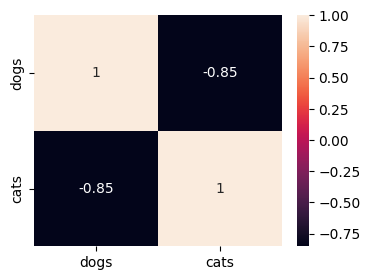

: 

In [33]:
import seaborn as sns
fig2, ax2 = plt.subplots(figsize=(4,3))
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
corr= df.corr()
sns.heatmap(corr, ax=ax2, annot=True)
print(df)
print(corr)
corr.loc['dogs'] = -2
print(corr)
print(corr.loc['dogs']['cats'])
X['dti'][0]
